#  Tarea 03. Optimización e interpolación

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Ejercicio 1

i) Modifica la implementación del método de Newton-Raphson del notebook _04. Solución de ecuaciones no lineales_ para que no tenga que pedir la derivada analítica como uno de sus argumentos, y en su lugar use una derivada numérica centrada (ver notebook _03. Integración y derivación numérica_). **Ojo**, escojan un paso $h$ suficientemente pequeño para que la derivada numérica se parezca a la analítica. Un valor $h=1e-4$ debería ser suficiente, pero pueden explorarlo.  

ii) Prueba tu nueva implementación con alguna función de tu elección y muestra gráficamente que encuentras alguna de las raíces de la función que escojas. Es decir, gráfica tu función y corrobora (y escríbelo con palabras) que encontraste $x_*$ tal que $f(x_*)=0$.

In [2]:
#I)

def newton_raphson(f,x_inicial,n):
    xx_nr = [x_inicial]
    h=1e-4
    for i in range(1,n):
        xx_nr.append(xx_nr[i-1] - f(xx_nr[i-1])/((f(xx_nr[i-1]+h)-f(xx_nr[i-1]-h))/(2*h)))
    return xx_nr

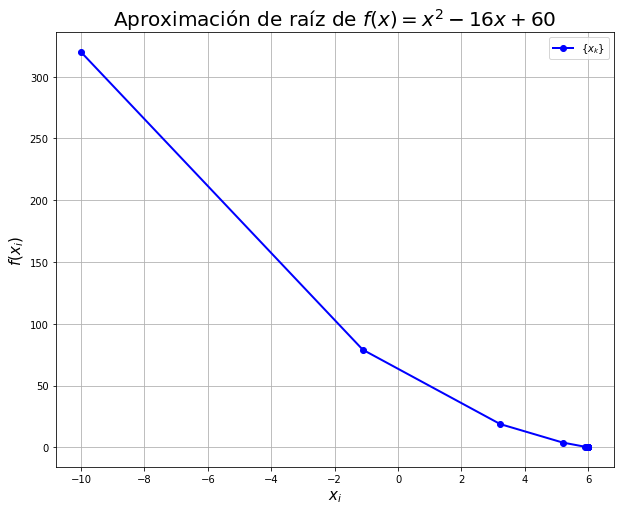

In [3]:
#II)

def f1(x):
    return x**2-16*x+60

nr1 = newton_raphson(f1,-10,n=1000)

plt.figure(figsize=(10,8))
plt.plot(nr1,[f1(x) for x in nr1],marker=".",lw=2,markersize=12,c="b",label="{$x_k$}")
plt.xlabel("$x_i$",fontsize=15)
plt.ylabel("$f(x_i)$",fontsize=15)
plt.title("Aproximación de raíz de $f(x)=x^2-16x+60$", fontsize=20)
plt.legend()
plt.grid()
plt.show()

Lo anterior establece que $6$ es raíz de $f(x)=x^2-16x+60$, es decir, $f(6)=0$. Analíticamente tiene sentido pues

$$f(x)=x^2-16x+60=(x-6)(x-10)$$

donde $f(x)=0$ si $x=6$ o $x=10$.

##### Ejercicio 2

i) Modifica la implementación del método de descenso de gradiente del notebook _04. Solución de ecuaciones no lineales_ para que en lugar de tomar como argumento la derivada de la función que están minimizando, tome como arguménto a la función misma. Para ello deberán usar una derivada numérica en la implementación. Usen la centrada. **Mismo ojo que en E1.1**.  


ii) Prueba tu nueva implementación con alguna función de tu elección y muestra gráficamente que encuentras algún mínimo de la función que escojas, es decir, gráfica tu función y corrobora (y escríbelo con palabras) que encontraste $x_m$ tal que $f(x_m)$ es un mínimo local.  

In [4]:
#I)

def desGrad(f,x0,alpha,n):
    xx_dg = [x0]
    h=1e-4
    for i in range(1,n):
        x_new = xx_dg[i-1] - alpha*((f(xx_dg[i-1]+h)-f(xx_dg[i-1]-h))/(2*h))
        xx_dg.append(x_new)
    return xx_dg

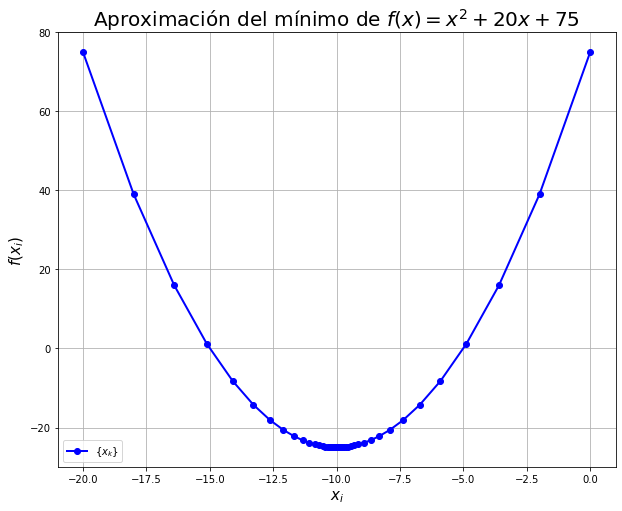

In [5]:
#II)

def f2(x):
    return x**2+20*x+75

dg1 = desGrad(f2,0,0.1,n=1000)
dg2 = desGrad(f2,-20,0.1,n=1000)

plt.figure(figsize=(10,8))
plt.plot(dg1,[f2(x) for x in dg1],marker=".",lw=2,markersize=12,c="b",label="{$x_k$}")
plt.plot(dg2,[f2(x) for x in dg2],marker=".",lw=2,markersize=12,c="b")
plt.xlabel("$x_i$",fontsize=15)
plt.ylabel("$f(x_i)$",fontsize=15)
plt.title("Aproximación del mínimo de $f(x)=x^2+20x+75$", fontsize=20)
plt.legend()
plt.grid()
plt.show()

Lo anterior establece que $-10$ es el mínimo de $f(x)=x^2+20x+75$, es decir, $f(-10)\leq f(x)\,\forall x$. Analíticamente tiene sentido pues

$$f'(x)=2x+20=0\Rightarrow x=-10 $$

Por lo tanto $-10$ es un mínimo.

##### Ejercicio 3: Un método "más numérico" de encontrar puntos críticos

$$ f_3(x) = x^2 - 10\sqrt[3]{\cos{7x}} - 5\tanh^{-1}{\left( e^{-x^2+1} \right)}$$


i) Grafica la función $f_3(x)$. Para ello crea un arreglo `xx_datos` uniformemente espaciado con extremos -4 y 4 y otro arreglo `yy_datos` que contenga los valores de $f_3(x)$ para cada valor de `xx_datos`. Cuántas mínimos locales y máximos locales tiene en el intervalo $[-4,4]$?  

**Ojo**: para este ejercicio es muy importante que uses una cantidad "grande" de puntos.  
**Nota**: siempre que les digan "grande" o "pequeño" deben preguntarse respecto a qué, en este caso por "grande" me refiero a que sean suficientes para que la gráfica se vea suave.

ii) Encontrar picos en un conjunto ordenado de datos: la manera más simple de encontrar picos en una distribución de datos es comparar los datos con sus vecinos. Un pico cumplirá que es mayor que sus vecinos (el dato anterior y el dato siguiente). Implementa una función `encontrar_picos` que tome como argumentos dos arreglos con las coordenadas en x y en y de los datos donde buscamos los picos, `datosxx` y `datosyy`. Tu función debe regresar dos arreglos: `picos_xx`, `picos_yy`. En el primero deben estar las coordenadas $x$ de todos los picos que encuentres y en el segundo las coordenadas en $y$. 

iii) Pueden encontrar además valles siguiendo un razonamiento similar al que usamos para encontrar los picos, pero un valle será menor que sus vecinos en lugar de ser mayor. Adecua tu implementación de `encontrar_picos` para encontrar valles. Llama a la función `encontrar_valles`.

iv) Usa tus funciones `encontrar_picos` y `encontrar_valles` para encontrar los picos de de $f_3(x)$ usando los arreglos que definiste para hacer la gráfica en i). Además, repíte la gráfica pero añadiendo puntos en los picos y los valles (usa dos colores para esto).

**Nota**: Hay un rollo en python al elevar un número negativo a una potencia racional. Para salvar eso, usé que la raíz cúbica de x puede representarse como `sign(x) * abs(x)**(1/3)`. Les dejo la función $f_3(x)$ definida aquí abajo:

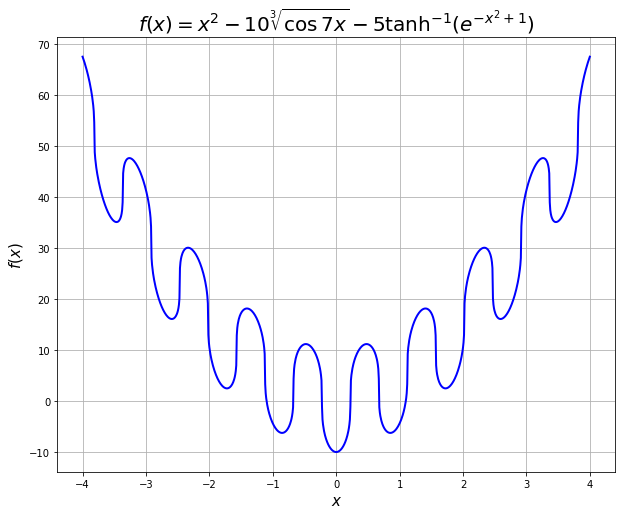

In [17]:
#I)

def f3(x):
    return x**2 - 10*np.sign(np.cos(7*x))*abs(np.cos(7*x))**(1/3) - 5*np.arctanh(np.exp(-x**2)-1)

xx_datos = np.linspace(-4,4,1001)
yy_datos = [f3(x) for x in xx_datos]

plt.figure(figsize=(10,8))
plt.plot(xx_datos,yy_datos,lw=2,c="b")
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$f(x)$",fontsize=15)
plt.title("$f(x)=x^2 - 10\sqrt[3]{\cos{7x}} - 5\\tanh^{-1}{( e^{-x^2+1})}$", fontsize=20)
plt.grid()
plt.show()

$f(x)$ tiene $9$ mínimos locales y $8$ máximos locales tiene en el intervalo $[-4,4]$

In [7]:
#II)

def encontrar_picos(xx,yy):
    picos_xx=[]
    picos_yy=[]
    
    for i in range(1,len(yy)-1):
        if yy[i]>yy[i-1]:
            if yy[i]>yy[i+1]:
                picos_xx.append(xx[i])
                picos_yy.append(yy[i])
            else:
                continue
        else:
            continue
    
    return picos_xx,picos_yy

In [8]:
#III)

def encontrar_valles(xx,yy):
    valles_xx=[]
    valles_yy=[]
    
    for i in range(1,len(yy)-1):
        if yy[i]<yy[i-1]:
            if yy[i]<yy[i+1]:
                valles_xx.append(xx[i])
                valles_yy.append(yy[i])
            else:
                continue
        else:
            continue
    
    return valles_xx,valles_yy

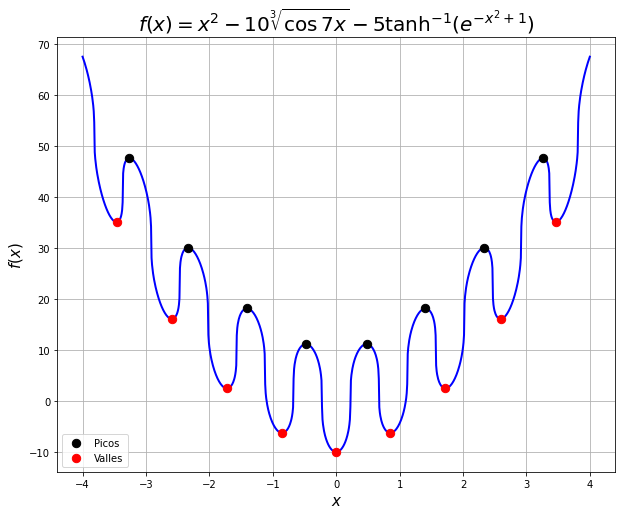

In [9]:
#IV)

plt.figure(figsize=(10,8))
plt.plot(xx_datos,yy_datos,lw=2,c="b")
plt.scatter(encontrar_picos(xx_datos,yy_datos)[0],encontrar_picos(xx_datos,yy_datos)[1],s=70,c="k",label="Picos",zorder=2)
plt.scatter(encontrar_valles(xx_datos,yy_datos)[0],encontrar_valles(xx_datos,yy_datos)[1],s=70,c="r",label="Valles",zorder=2)
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$f(x)$",fontsize=15)
plt.title("$f(x)=x^2 - 10\sqrt[3]{\cos{7x}} - 5\\tanh^{-1}{( e^{-x^2+1})}$", fontsize=20)
plt.legend()
plt.grid()
plt.show()

#### Ejercicio 4

Paa este ejercicio necesitan usar la función `ip_chebyshev` definida en el notebook _05. Interpolación_, por lo que es necesario que las definan aquí abajo. Además, debido a las dependencias de esa función, tambien tienen que tener las funciones `L_i`, `interpolar` y `xx_chebyshev`, todas definidas en el notebook _05. Interpolacion_. Si solo van a copiar y pegar lo del notebook que subí al classroom esas definiciones, al menos intenten recordar que es lo que cada una de ellas hace.

i) Sea $f_4(x) = e^{-5x^2}$. Calcula numéricamente el error al utilizar la interpolación de Chebyshev $\mathrm{fip_{cheb}}(x)$ con respecto a la función original $f_4(x)$, dado por la norma

$$\|f_4 - \mathrm{fip_{cheb}}\|_{\infty} := \max |f_4(x) - \mathrm{fip_{cheb}}(x)|,$$

para distintos números de puntos de Chebyshev. $\text{fip}_{\text{cheb}}$ es la función que obtienes al usar `ip_chebyshev` (ver notebook _05. Interpolación_) ¿Cómo es la convergencia conforme se aumenta el número de puntos?

ii) Repite i) para alguna función polinomial de tu elección. Qué observas cuando el número de puntos que usas es mayor al orden del polínomio? **_Hint_**: [teorema de interpolación de Lagrange](https://en.wikipedia.org/wiki/Lagrange_polynomial)

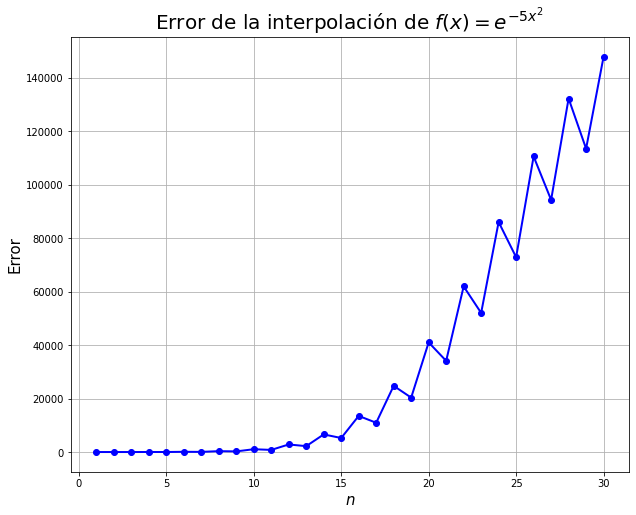

In [16]:
#I)

def L_i(x,i,datos_xx):
    i = i-1
    N = len(datos_xx)
    factores = [(x-datos_xx[j])/(datos_xx[i]-datos_xx[j]) for j in range(N) if i!=j]
    res = np.prod(factores)
    return res

def interpolar(datos):
    
    datos = np.array(datos)
    dxx = datos[:,0]
    dyy = datos[:,1]
    
    def f_ip(x):    
        sumandos = [ dyy[i-1] * L_i(x,i,dxx) for i in range(1,len(dxx)+1)]
        L = sum(sumandos)
        return L
    
    return f_ip

def xx_chebyshev(n):
    return [np.cos(j*np.pi/n) for j in range(n+1)]

def ip_chebyshev(funcion,n):
    datos_xx = xx_chebyshev(n)
    datos_yy = [funcion(xj) for xj in datos_xx]
    datos = [ (x,y) for x,y in zip(datos_xx,datos_yy)]
    datos = np.array(datos)
    funcion_ip = interpolar(datos)
    return datos_xx, datos_yy , funcion_ip

def f4(x):
    return np.e**(-5*x**2)

xxe = np.linspace(-2,2,100)
nn = np.linspace(1,30,30,dtype="int")
ee = []


fe = [f4(x) for x in xxe]

for n in nn:
    ee.append(np.max([abs(fe[i]-[ip_chebyshev(f4,n)[2](x) for x in xxe][i]) for i in range(len(xxe))]))
    
plt.figure(figsize=(10,8))
plt.plot(nn,ee,marker=".",lw=2,markersize=12,c="b")
plt.title("Error de la interpolación de $f(x) = e^{-5x^2}$",fontsize=20)
plt.xlabel("$n$",fontsize=15)
plt.ylabel("Error",fontsize=15)
plt.grid()
plt.show()

Se tiene que conforme aumenta la cantidad de puntos el error diverge a infinito, es decir, si $n\rightarrow\infty$ entonces $error\rightarrow\infty$, además en los pultimos valores de $n$ se observa los valores pares de $n$ su error correspondiente es mayor que los errores correspondientes a los valores de $n$ impares vecinos.

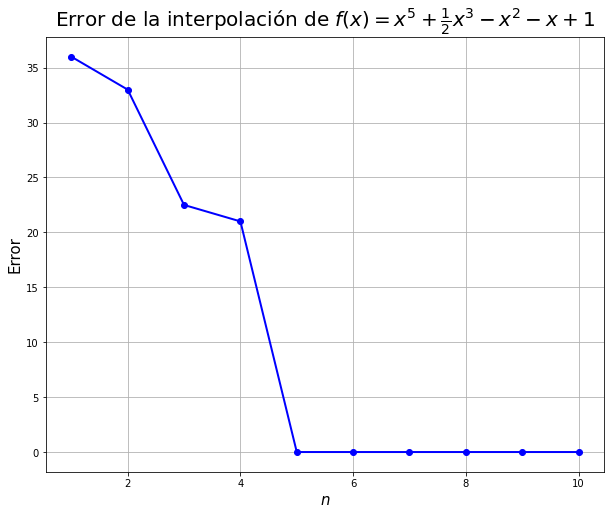

In [15]:
#II)

def f5(x):
    return x**5+1/2*x**3-x**2-x+1

nn5 = np.linspace(1,10,10,dtype="int")
ee5 = []


fe5 = [f5(x) for x in xxe]

for n in nn5:
    ee5.append(np.max([abs(fe5[i]-[ip_chebyshev(f5,n)[2](x) for x in xxe][i]) for i in range(len(xxe))]))
    
plt.figure(figsize=(10,8))
plt.plot(nn5,ee5,marker=".",lw=2,markersize=12,c="b")
plt.title("Error de la interpolación de $f(x)=x^5+\\frac{1}{2}x^3-x^2-x+1$",fontsize=20)
plt.xlabel("$n$",fontsize=15)
plt.ylabel("Error",fontsize=15)
plt.grid()
plt.show()

De lo anterior se observa que cuando el número de puntos $n$ tiende al grado del polinomio entonces el error de la interpolación tiende a ser menos, llegando al punto en que cuando el número de puntos $n$ es igual o mayor al grado del polinomio el error tiende a ser $0$. Con base al teorema de interpolación de Lagrange se puede decir que un polinomio de grado $m$ se aproxima a la la combinación lineal de $m$ polinomios de grado $m-1,m-2,...,0$.